# Computer simulation of liquids (ALLEN)

In [1]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Potencial Lennard-Jones

** Nota: Se utilizarán unidades reducidas. Se utilizará el diámetro de las particulas, $\sigma$, como factor de escalamiento para las variables de longitud.

 $u(r) = 4ε * \left[ \left(\frac{1}{x} \right)^{12} - \left(\frac{1}{x} \right)^{6} \right] $ 

donde:

$x = r/σ$

### Fuerza del potencial Lennard-Jones

 $F(r) = -\frac{∂u}{∂x} = 48ε * \left[ \left(x \right)^{-13} - \frac{1}{2} \left(x \right)^{-7} \right] $ 

In [3]:
# Definimos los arreglos
x = np.arange(0.01,5,0.01)
eps = np.array([0.1, 0.5, 1.0, 2.0, 5.0, 10.0])

v1 = 4 * eps[0] * ((1/x) ** 12 - (1/x) ** 6)
v2 = 4 * eps[1] * ((1/x) ** 12 - (1/x) ** 6)
v3 = 4 * eps[2] * ((1/x) ** 12 - (1/x) ** 6)
v4 = 4 * eps[3] * ((1/x) ** 12 - (1/x) ** 6)
v5 = 4 * eps[4] * ((1/x) ** 12 - (1/x) ** 6)
v6 = 4 * eps[5] * ((1/x) ** 12 - (1/x) ** 6)

y7 = 48 * eps[0] * ((x) ** -13 - 0.5 * (x) ** -7)
y8 = 48 * eps[1] * ((x) ** -13 - 0.5 * (x) ** -7)
y9 = 48 * eps[2] * ((x) ** -13 - 0.5 * (x) ** -7)
y10 = 48 * eps[3] * ((x) ** -13 - 0.5 * (x) ** -7)
y11 = 48 * eps[4] * ((x) ** -13 - 0.5 * (x) ** -7)
y12 = 48 * eps[5] * ((x) ** -13 - 0.5 * (x) ** -7)

#### Grafica del potencial, V

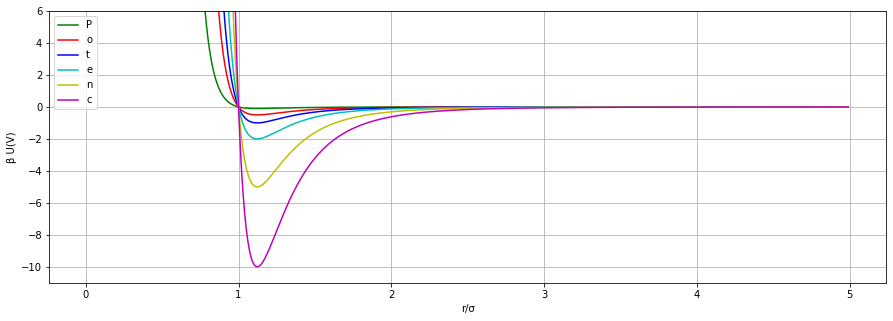

In [5]:
plt.plot(x,v1, "-", color = 'g', label="ε = 0.1")
plt.plot(x,v2, "-", color = 'r', label="ε = 0.5")
plt.plot(x,v3, "-", color = 'b', label="ε = 1.0")
plt.plot(x,v4, "-", color = 'c', label="ε = 2.0")
plt.plot(x,v5, "-", color = 'y', label="ε = 5.0")
plt.plot(x,v6, "-", color = 'm', label="ε = 10.0")

plt.xlabel("r/σ")
plt.ylabel("β U(V)")
plt.ylim(-11, 6)
plt.grid(b=None, which='major', axis='both')
plt.rcParams["figure.figsize"] = (15,5)
plt.legend()

#### Grafica de la fuerza, F

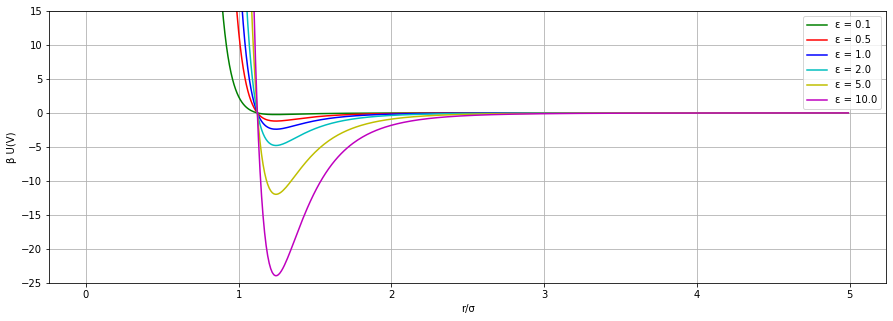

In [12]:
plt.plot(x,y7, "-", color = 'g', label="ε = 0.1")
plt.plot(x,y8, "-", color = 'r', label="ε = 0.5")
plt.plot(x,y9, "-", color = 'b', label="ε = 1.0")
plt.plot(x,y10, "-", color = 'c', label="ε = 2.0")
plt.plot(x,y11, "-", color = 'y', label="ε = 5.0")
plt.plot(x,y12, "-", color = 'm', label="ε = 10.0")

plt.xlabel("r/σ")
plt.ylabel("β U(V)")
plt.ylim(-25, 15)
plt.grid(b=None, which='major', axis='both')
plt.rcParams["figure.figsize"] = (15,5)
plt.legend()

## Energia potencial

Para crear una configuración de partículas, vamos a determinar la distancia promedio entre partículas. 

Al fijar una densidad, $\rho = N / V$ (donde N es el número de partículas y V el volumen de la caja), la separación entre estas es:

$d = \frac{L}{ N^{1/3}}= \frac{1}{ \rho^{1/3}}$

donde L es la longitud de un solo lado de la caja de simulación.

In [10]:
nmoleculas=1000           # Numero de moleculas
ro=0.99                   # Densidad reducida

In [11]:
# Generamos el arreglo de particulas
x1 = np.zeros(nmoleculas)
y1 = np.zeros(nmoleculas)
z1 = np.zeros(nmoleculas)

# Configuracion inicial
sep=1/(ro**(1/3)) #d
nxlado= int (np.ceil((nmoleculas)**(1/3)))
x1[0]= sep*(nxlado)
y1[0]= x1[0]
z1[0]= x1[0]
chec=1
i=1
while i<=nxlado :
    if (chec<=nmoleculas):
        x1[chec]=sep*i
        y1[chec]=sep
        z1[chec]=sep
        chec=chec+1
    if (chec>nxlado):
        i=nxlado+1
    i=1+i
j=1

while j<=nxlado:
    if (chec<=nmoleculas):
        k=1
        while k<=(nxlado-1):
            x1[chec]=x1[j]
            y1[chec]=sep*(k+1)
            z1[chec]=sep
            chec=chec+1
            k=k+1
        if (chec>nmoleculas):
            j=nxlado+1
            k=nxlado+1
    j=j+1
m=1

while m<=nxlado:
    n=1
    while n<=(nxlado):
        q=1
        while q<=(nxlado-1):
            x1[chec]=x1[m]
            y1[chec]=x1[n]
            z1[chec]=sep*(q+1)
            chec=chec+1
            q=q+1
            if (chec>nmoleculas-1):
                q=nxlado+1
                m=nxlado+1
                n=nxlado+1
        n=n+1
    m=m+1

/tmp/ipykernel_132/418808077.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


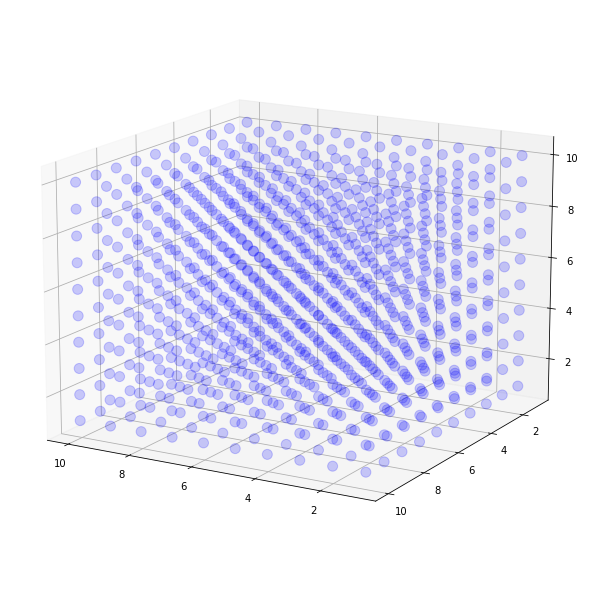

In [12]:
plt.rcParams["figure.figsize"] = (8,8)
fig = pyplot.figure()
ax = Axes3D(fig)          
ax.scatter(x1, y1, z1, color='b', s=100, alpha = 0.2)
ax.view_init(15, 120)

In [8]:
## Calculamos la energia potencial de la configuracion
sigsq=1

for w in range(0, len(eps)):
    epsilon=eps[w]
    v=0.0
    n=nmoleculas
    i=1
    while i<=(n-1):
        rxi=x1[i]
        ryi=y1[i]
        rzi=z1[i]
        j=(i+1)
        while j<=n-1:
            rxij=rxi-x1[j]
            ryij=ryi-y1[j]
            rzij=rzi-z1[j]

            rijsq=rxij**2+ryij**2+rzij**2
            sr2=sigsq/rijsq
            sr6=sr2*sr2*sr2
            sr12=sr6**2
            v=v+sr12-sr6
            j=j+1
        i=i+1
    v=4*epsilon*v
    print("Energia potencial (ε=", eps[w],")= ", v)

Energia potencial (ε= 0.1 )=  -14.321910395206936
Energia potencial (ε= 0.5 )=  -71.60955197603468
Energia potencial (ε= 1.0 )=  -143.21910395206936
Energia potencial (ε= 2.0 )=  -286.4382079041387
Energia potencial (ε= 5.0 )=  -716.0955197603469
Energia potencial (ε= 10.0 )=  -1432.1910395206937


In [13]:
## Calculamos la energia potencial de la configuracion
sigsq=1

for w in range(0, len(eps)):
    epsilon=eps[w]
    v=0.0
    n=nmoleculas
    i=1
    while i<=(n-1):
        rxi=x1[i]
        ryi=y1[i]
        rzi=z1[i]
        j=(i+1)
        while j<=n-1:
            rxij=rxi-x1[j]
            ryij=ryi-y1[j]
            rzij=rzi-z1[j]

            rijsq=rxij**2+ryij**2+rzij**2
            sr2=sigsq/rijsq
            sr6=sr2*sr2*sr2
            sr12=sr6**2
            v=v+sr12-sr6
            j=j+1
        i=i+1
    v=4*epsilon*v
    print("Energia potencial (ε=", eps[w],")= ", v)
    

Energia potencial (ε= 0.1 )=  -347.07510042597437
Energia potencial (ε= 0.5 )=  -1735.3755021298718
Energia potencial (ε= 1.0 )=  -3470.7510042597437
Energia potencial (ε= 2.0 )=  -6941.502008519487
Energia potencial (ε= 5.0 )=  -17353.75502129872
Energia potencial (ε= 10.0 )=  -34707.51004259744
